# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.065566e+01     6.716204e+00
 * time: 0.0037560462951660156
     1     2.781361e+01     4.700140e+00
 * time: 0.01172494888305664
     2     1.997420e+01     4.045074e+00
 * time: 0.031349897384643555
     3     1.328575e+01     1.335173e+00
 * time: 0.05240201950073242
     4     1.244303e+01     1.641770e+00
 * time: 0.06694698333740234
     5     1.205401e+01     9.671430e-01
 * time: 0.1218419075012207
     6     1.163816e+01     1.562371e+00
 * time: 0.13651609420776367
     7     1.118580e+01     8.789553e-01
 * time: 0.15089201927185059
     8     1.081381e+01     7.389577e-01
 * time: 0.16513490676879883
     9     1.058621e+01     5.631480e-01
 * time: 0.1794281005859375
    10     1.042346e+01     5.916000e-01
 * time: 0.19363093376159668
    11     1.033403e+01     4.720223e-01
 * time: 0.2078249454498291
    12     1.025484e+01     5.230452e-01
 * time: 0.2221829891204834
    13     1.019500e+01     4.791006e-01
 * time: 

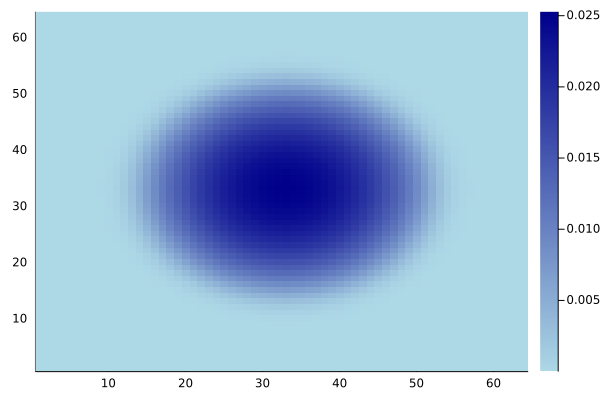

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)